In [1050]:
import numpy as np
import pandas as pd

In [1051]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1052]:
import statsmodels.api as sm

# Introduction

Data fields

    id - a unique identifier for each trip
    vendor_id - a code indicating the provider associated with the trip record
    pickup_datetime - date and time when the meter was engaged
    dropoff_datetime - date and time when the meter was disengaged
    passenger_count - the number of passengers in the vehicle (driver entered value)
    pickup_longitude - the longitude where the meter was engaged
    pickup_latitude - the latitude where the meter was engaged
    dropoff_longitude - the longitude where the meter was disengaged
    dropoff_latitude - the latitude where the meter was disengaged
    store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
    trip_duration - duration of the trip in seconds


In [1053]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [1054]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [1055]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [1056]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


## Creating more columns from datetime

In [1057]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [1058]:
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [1059]:
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.day
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['pickup_hour'] = df['pickup_datetime'].dt.hour

In [1060]:
df['dropoff_year'] = df['dropoff_datetime'].dt.year
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_date'] = df['dropoff_datetime'].dt.day
df['dropoff_dayofweek'] = df['dropoff_datetime'].dt.dayofweek
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

In [1061]:
df['pickup_year'].value_counts()

2016    729322
Name: pickup_year, dtype: int64

## Calculating distance using longitude and latitude

In [1062]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6372.8 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [1063]:
distance = []

In [1064]:
for i in range(df.shape[0])[:]:
    distance.append(haversine(df.loc[i,'pickup_longitude'], df.loc[i,'pickup_latitude'], df.loc[i,'dropoff_longitude'], df.loc[i,'dropoff_latitude']))

In [1065]:
df['distance'] = distance

Distance calculated here is great circle distance. Actual distance traveled by taxi on road will be more.

We can calculate average speed by using distance and trip duration.

we will measure speed in Kilometers per hour. Since trip duration is in seconds we modify the time to hours.

In [1066]:
df['speed'] = df['distance'] / (df['trip_duration']/3600)

# Univariate and Bivariate Analysis of columns

In [1067]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_year', 'pickup_month', 'pickup_date',
       'pickup_dayofweek', 'pickup_hour', 'dropoff_year', 'dropoff_month',
       'dropoff_date', 'dropoff_dayofweek', 'dropoff_hour', 'distance',
       'speed'],
      dtype='object')

## id

In [1068]:
df['id'].value_counts().max()

1

In [1069]:
df['id'].value_counts().min()

1

'id' is unique identifier of trip. Not useful in predictive modeling.

## vendor_id

In [1070]:
df['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

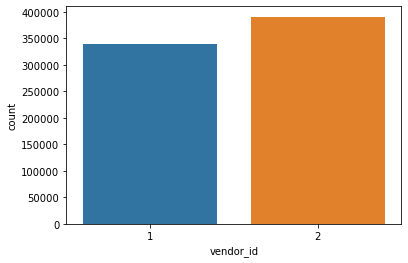

In [1071]:
sns.countplot(data=df, x='vendor_id')

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

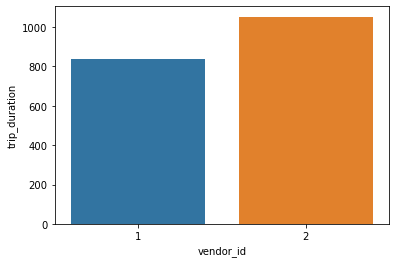

In [1072]:
sns.barplot(data=df, x='vendor_id', y='trip_duration', ci=None)

## passenger_count

In [1073]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

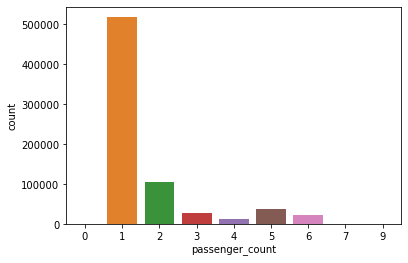

In [1074]:
sns.countplot(data=df, x='passenger_count')

In [1075]:
df.groupby(by='passenger_count').mean()

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_year,pickup_month,pickup_date,pickup_dayofweek,pickup_hour,dropoff_year,dropoff_month,dropoff_date,dropoff_dayofweek,dropoff_hour,distance,speed
passenger_count,,,,,,,,,,,,,,,,,,
0,1.424242,-73.959054,40.737850,-73.971903,40.737296,403.969697,2016.0,2.666667,13.727273,3.818182,10.090909,2016.0,2.666667,13.727273,3.818182,10.242424,1.903536,5.794785
1,1.467961,-73.973541,40.751205,-73.973376,40.751970,921.403438,2016.0,3.515681,15.494170,2.995023,13.512956,2016.0,3.516044,15.493743,2.998579,13.513926,3.385268,14.448244
2,1.562347,-73.973409,40.749763,-73.973526,40.751054,995.422191,2016.0,3.536114,15.482411,3.205886,13.980742,2016.0,3.536485,15.484010,3.210444,13.948923,3.664591,14.415726
3,1.618045,-73.974236,40.750232,-73.974081,40.751558,1026.482285,2016.0,3.552674,15.623569,3.235484,13.923649,2016.0,3.553078,15.624175,3.242186,13.898222,3.541436,14.251104
4,1.576157,-73.974198,40.749265,-73.974492,40.750573,1013.849181,2016.0,3.542420,15.599715,3.309324,14.012171,2016.0,3.542491,15.610819,3.314093,13.976655,3.616233,14.105652
5,1.995530,-73.972712,40.751089,-73.973008,40.751586,1085.312953,2016.0,3.478652,15.530263,3.092149,13.652161,2016.0,3.478934,15.534501,3.097210,13.645584,3.489278,14.493816
6,1.997055,-73.973402,40.751373,-73.973189,40.752050,1084.088232,2016.0,3.508773,15.508234,3.073920,13.444394,2016.0,3.509064,15.511470,3.077529,13.457170,3.394625,14.284528
7,2.000000,-74.173668,40.737274,-74.173660,40.737297,19.000000,2016.0,6.000000,7.000000,1.000000,10.000000,2016.0,6.000000,7.000000,1.000000,10.000000,0.002626,0.497504
9,2.000000,-73.710632,40.671581,-73.710632,40.671581,560.000000,2016.0,6.000000,24.000000,4.000000,8.000000,2016.0,6.000000,24.000000,4.000000,8.000000,0.000000,0.000000


<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

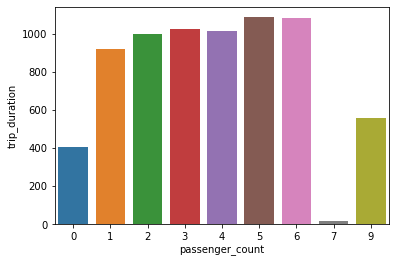

In [1076]:
sns.barplot(data=df, x='passenger_count', y='trip_duration', ci=None)

## store_and_fwd_flag

In [1077]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='count'>

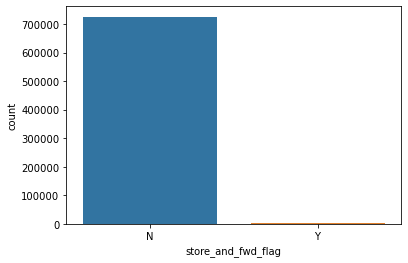

In [1078]:
sns.countplot(data=df, x='store_and_fwd_flag')

In [1079]:
df.groupby(by='store_and_fwd_flag').mean()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_year,pickup_month,pickup_date,pickup_dayofweek,pickup_hour,dropoff_year,dropoff_month,dropoff_date,dropoff_dayofweek,dropoff_hour,distance,speed
store_and_fwd_flag,,,,,,,,,,,,,,,,,,,
N,1.538385,1.664102,-73.973574,40.750942,-73.973473,40.751806,951.434656,2016.0,3.518380,15.501115,3.049364,13.610725,2016.0,3.518733,15.501641,3.053270,13.604876,3.433028,14.419839
Y,1.000000,1.294554,-73.962548,40.746764,-73.964284,40.746264,1094.857921,2016.0,3.523762,15.676733,2.998267,13.786386,2016.0,3.524257,15.672525,3.007178,13.836634,5.072703,15.445911


<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='trip_duration'>

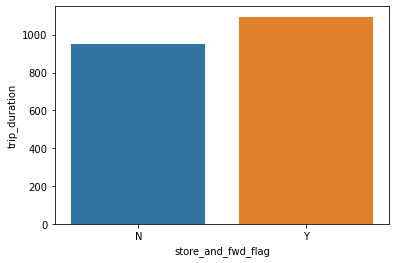

In [1080]:
sns.barplot(data=df, x='store_and_fwd_flag', y='trip_duration', ci=None)

## year

In [1081]:
df['pickup_year'].value_counts()

2016    729322
Name: pickup_year, dtype: int64

In [1082]:
df['dropoff_year'].value_counts()

2016    729322
Name: dropoff_year, dtype: int64

Since year is same for all trips, it is not needed in predictions.

## month

In [1083]:
df['pickup_month'].value_counts()

3    128316
4    125634
5    124201
2    119364
6    117406
1    114401
Name: pickup_month, dtype: int64

In [1084]:
df['dropoff_month'].value_counts()

3    128284
4    125633
5    124236
2    119361
6    117380
1    114375
7        53
Name: dropoff_month, dtype: int64

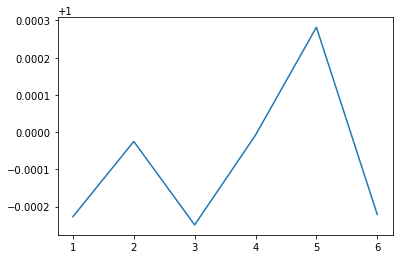

In [1085]:
plt.plot(df['dropoff_month'].value_counts() / df['pickup_month'].value_counts())

<AxesSubplot:xlabel='pickup_month', ylabel='count'>

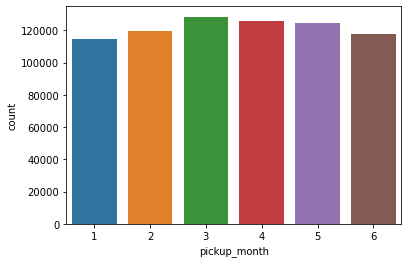

In [1086]:
sns.countplot(data=df, x='pickup_month')

<AxesSubplot:xlabel='dropoff_month', ylabel='count'>

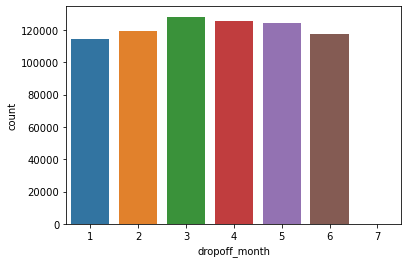

In [1087]:
sns.countplot(data=df, x='dropoff_month')

In [1088]:
df.groupby(by='pickup_month').mean()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_year,pickup_date,pickup_dayofweek,pickup_hour,dropoff_year,dropoff_month,dropoff_date,dropoff_dayofweek,dropoff_hour,distance,speed
pickup_month,,,,,,,,,,,,,,,,,,
1,1.539689,1.669697,-73.973000,40.750794,-73.973223,40.751783,924.769530,2016.0,16.003750,3.154396,13.547854,2016.0,1.000227,16.007203,3.157306,13.552810,3.375844,14.787240
2,1.537960,1.656831,-73.974637,40.751008,-73.974370,40.751642,887.498995,2016.0,15.128992,2.996574,13.684654,2016.0,2.000243,15.131933,2.999347,13.688993,3.319706,14.532420
3,1.537127,1.658842,-73.973749,40.750985,-73.973419,40.751884,933.949336,2016.0,15.756087,2.975233,13.677117,2016.0,3.000475,15.752689,2.980135,13.663783,3.438910,14.582485
4,1.532085,1.667741,-73.973780,40.750909,-73.973626,40.751868,967.318481,2016.0,15.301415,3.174642,13.651512,2016.0,4.000493,15.298391,3.179458,13.636977,3.425338,14.245143
5,1.533595,1.664568,-73.973065,40.751022,-73.972965,40.751938,996.001055,2016.0,15.532145,3.003599,13.550559,2016.0,5.000217,15.537057,3.006345,13.549368,3.549164,14.274928
6,1.532204,1.654685,-73.972802,40.750779,-73.972923,40.751514,1002.321917,2016.0,15.297923,2.994310,13.550313,2016.0,6.000451,15.296424,2.999676,13.538056,3.539327,14.145168


<AxesSubplot:xlabel='pickup_month', ylabel='trip_duration'>

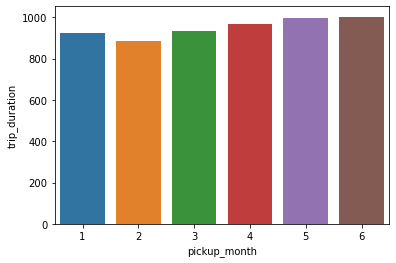

In [1089]:
sns.barplot(data=df, x='pickup_month', y='trip_duration', ci=None)

In [1090]:
df['pickup_month'].corr(df['trip_duration'])

0.009377519732332303

## date

In [1091]:
df['pickup_date'].value_counts()

16    25519
14    25206
12    25156
15    25037
5     25030
4     24958
6     24757
9     24729
13    24649
19    24646
20    24584
10    24575
11    24361
17    24338
21    24260
7     24254
18    24128
8     24113
2     23899
3     23858
26    23709
22    23627
29    23391
27    23376
1     23293
25    23288
28    22916
24    21877
23    20757
30    19642
31    11389
Name: pickup_date, dtype: int64

<AxesSubplot:xlabel='pickup_date', ylabel='count'>

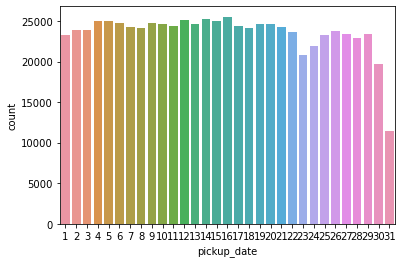

In [1092]:
sns.countplot(data=df, x='pickup_date')

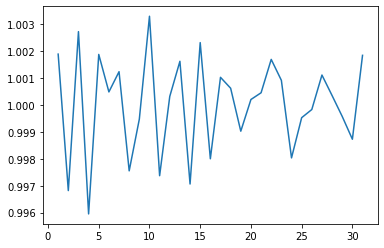

In [1093]:
plt.plot(df['dropoff_date'].value_counts() / df['pickup_date'].value_counts())

<AxesSubplot:xlabel='pickup_date', ylabel='trip_duration'>

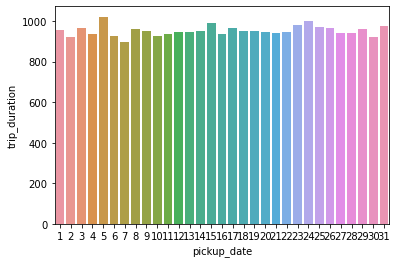

In [1094]:
sns.barplot(data=df, x='pickup_date', y='trip_duration', ci=None)

In [1095]:
df['pickup_date'].corr(df['trip_duration'])

0.0009992285831386043

## day of week

Monday is 0, Sunday is 6

In [1096]:
df['pickup_dayofweek'].value_counts()

4    111744
5    110252
3    109344
2    105074
1    101254
6     97682
0     93972
Name: pickup_dayofweek, dtype: int64

<AxesSubplot:xlabel='pickup_dayofweek', ylabel='count'>

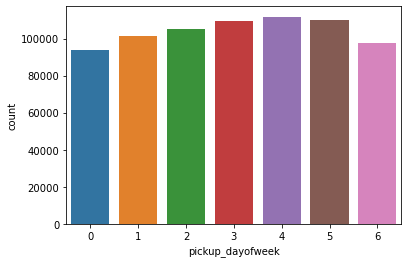

In [1097]:
sns.countplot(data=df, x='pickup_dayofweek')

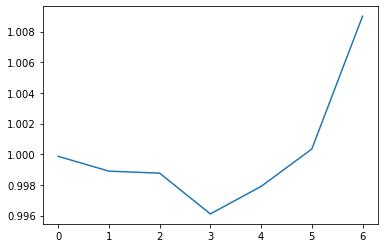

In [1098]:
plt.plot(df['dropoff_dayofweek'].value_counts().sort_index() / df['pickup_dayofweek'].value_counts().sort_index())

<AxesSubplot:xlabel='pickup_dayofweek', ylabel='trip_duration'>

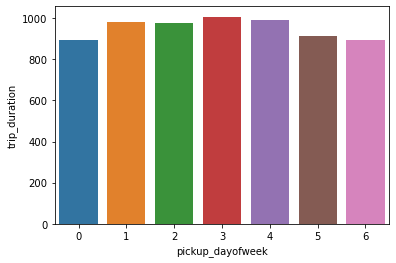

In [1099]:
sns.barplot(data=df, x='pickup_dayofweek', y='trip_duration', ci=None)

## hour

In [1100]:
df['pickup_hour'].value_counts()

18    45404
19    45262
20    42165
21    42045
22    40293
17    38313
14    37120
12    35820
15    35687
13    35630
23    35069
11    34061
9     33821
8     33612
10    32713
16    32147
7     27907
0     26726
1     19243
6     16552
2     13960
3     10424
4      7827
5      7521
Name: pickup_hour, dtype: int64

<AxesSubplot:xlabel='pickup_hour', ylabel='count'>

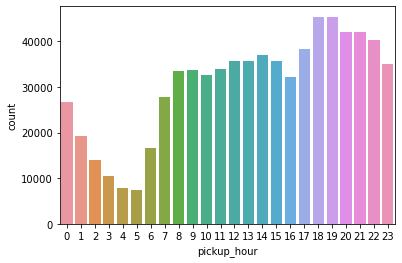

In [1101]:
sns.countplot(data=df, x='pickup_hour')

<AxesSubplot:xlabel='dropoff_hour', ylabel='count'>

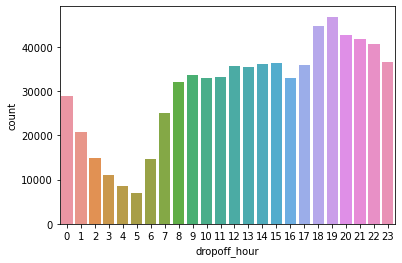

In [1102]:
sns.countplot(data=df, x='dropoff_hour')

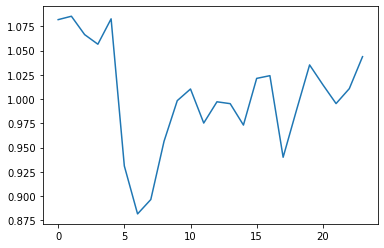

In [1103]:
plt.plot(df['dropoff_hour'].value_counts().sort_index() / df['pickup_hour'].value_counts().sort_index())

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

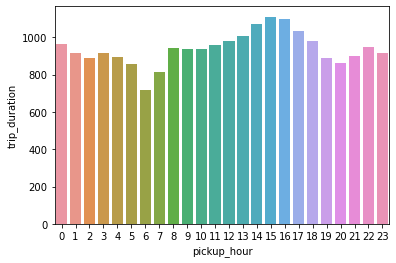

In [1104]:
sns.barplot(data=df, x='pickup_hour', y='trip_duration', ci=None)

<AxesSubplot:xlabel='dropoff_hour', ylabel='trip_duration'>

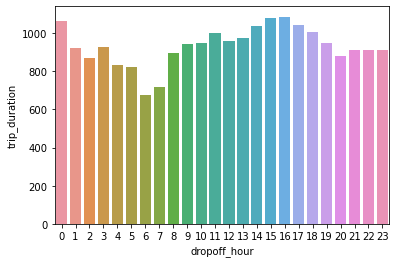

In [1105]:
sns.barplot(data=df, x='dropoff_hour', y='trip_duration', ci=None)

In [1106]:
def parts_of_day(h):
    if h < 7:
        return'night'
    elif h < 19:
        return'morning'
    elif h < 24:
        return'evening'

In [1107]:
df['pickup_hour'] = df['pickup_hour'].apply(parts_of_day)

In [1108]:
df['dropoff_hour'] = df['dropoff_hour'].apply(parts_of_day)

## Latitude and Longitude

In [1109]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_year', 'pickup_month', 'pickup_date',
       'pickup_dayofweek', 'pickup_hour', 'dropoff_year', 'dropoff_month',
       'dropoff_date', 'dropoff_dayofweek', 'dropoff_hour', 'distance',
       'speed'],
      dtype='object')

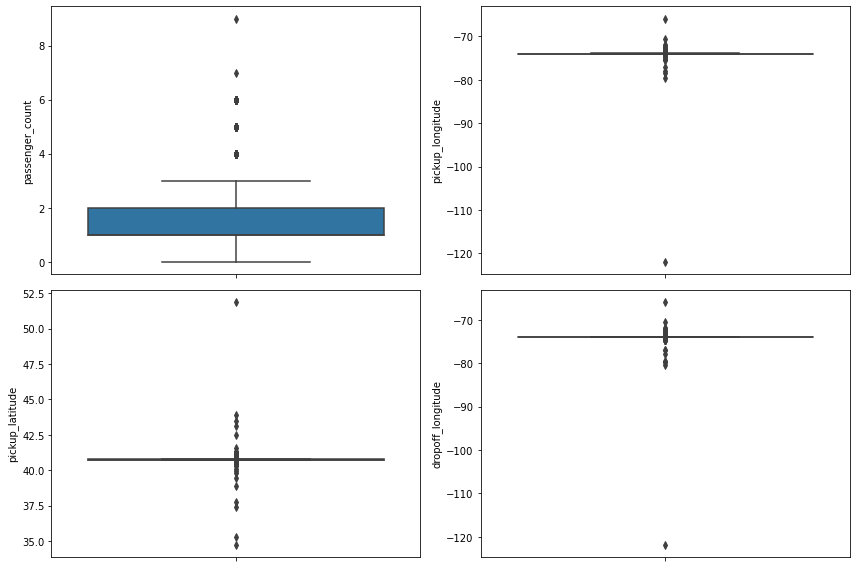

In [1110]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.boxplot(y=df[df.columns[i+4]], ax=ax)
plt.tight_layout()

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

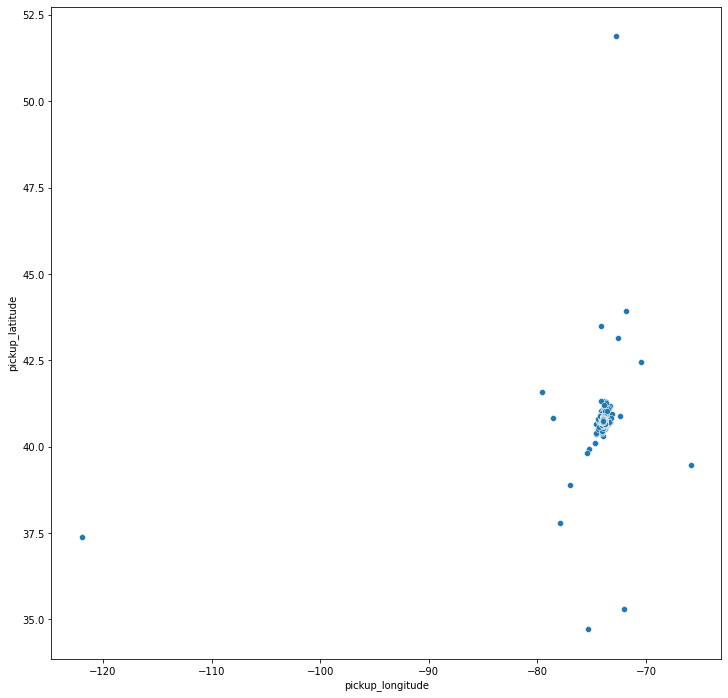

In [1111]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df, y='pickup_latitude', x='pickup_longitude')

In [1112]:
df_out = df[(df['pickup_latitude'] > 40.60) & 
            (df['pickup_latitude'] < 40.90) &
            (df['pickup_longitude'] > -74.05) &
            (df['pickup_longitude'] < -73.75)]

In [1113]:
df.shape

(729322, 23)

In [1114]:
df_out.shape

(728913, 23)

In [1115]:
df_out.shape[0] / df.shape[0] * 100

99.94392051796052

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

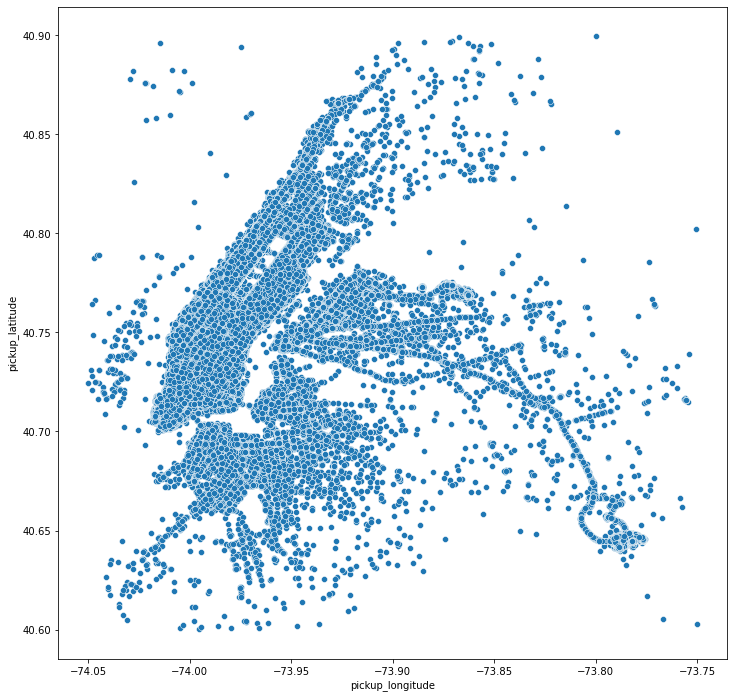

In [1116]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df_out, y='pickup_latitude', x='pickup_longitude')

In [1117]:
from IPython.display import Image
Image(url="New York.jpg", width=800, height=800)

## distance

In [1118]:
df['distance'].value_counts()

0.000000     2901
0.000424       44
0.000424       31
0.000424       23
0.001273       22
             ... 
1.108101        1
2.688882        1
2.458168        1
10.329748       1
5.947517        1
Name: distance, Length: 726199, dtype: int64

In [1119]:
df['distance'].mean()

3.4421108731888426

In [1120]:
df['distance'].median()

2.096264264016991

In [1121]:
df['distance'].std()

4.354362044371133

In [1122]:
df['distance'].max()

1241.259270846108

<AxesSubplot:xlabel='distance'>

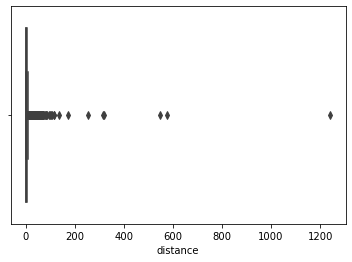

In [1123]:
sns.boxplot(x=df['distance'])

<AxesSubplot:xlabel='distance', ylabel='Count'>

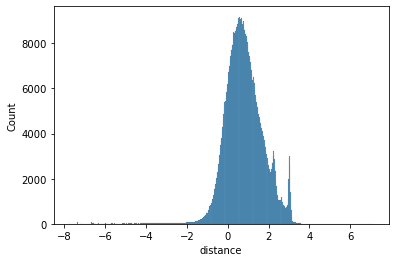

In [1341]:
sns.histplot(np.log(df['distance']))

1. **We will use logarithm of distance for predictions as it is closer to normal distribution.**
2. **We will remove entries with distance as zero as they are likely because of human or measurement error. And predicting trip duration when distance is zero doesn't make much sense. Also applying log when distance is zero produces errors.**

In [1125]:
df[df['distance'] == 0]['trip_duration'].mean()

524.6849362288866

In [1126]:
df = df[df['distance'] != 0]

C:\Users\dsanr\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


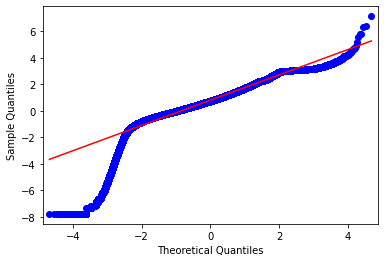

In [1344]:
sm.qqplot(np.log(df['distance']), line='s');

## speed

In [1127]:
df['speed'].value_counts()

0.509154     7
0.152746     4
0.254577     4
0.763731     3
0.610985     3
            ..
29.834985    1
12.159626    1
17.712205    1
3.477910     1
17.492698    1
Name: speed, Length: 726368, dtype: int64

In [1128]:
df['speed'].mean()

14.483132032156243

In [1129]:
df['speed'].median()

12.832521522127237

In [1130]:
df['speed'].std()

12.335365022426773

In [1131]:
df['speed'].min()

2.6804103603436515e-05

In [1132]:
df['speed'].max()

5642.087594755036

<AxesSubplot:xlabel='speed'>

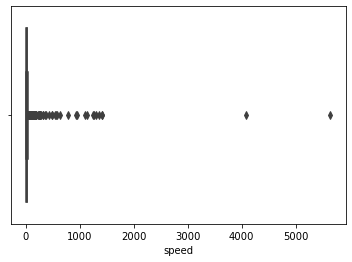

In [1133]:
sns.boxplot(x=df['speed'])

## trip_duration

In [1134]:
df['trip_duration'].value_counts()

348      829
363      805
368      805
388      801
358      798
        ... 
5686       1
85772      1
84339      1
86254      1
84188      1
Name: trip_duration, Length: 6295, dtype: int64

In [1135]:
df['trip_duration'].mean()

953.9365533210081

In [1136]:
df['trip_duration'].median()

664.0

In [1137]:
df['trip_duration'].std()

3870.798960405824

In [1138]:
df['trip_duration'].min()

1

In [1139]:
df['trip_duration'].max()

1939736

<AxesSubplot:xlabel='trip_duration'>

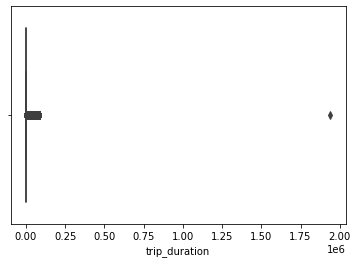

In [1140]:
sns.boxplot(x=df['trip_duration'])

there is one single entry with trip duration around 2 million seconds (around 23 days). we can remove this.

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

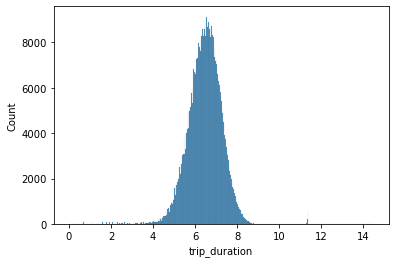

In [1141]:
sns.histplot(np.log(df['trip_duration']))

**We will use logarithm of trip_duration for predictions as it is closer to normal distribution.**

## Correlations

<AxesSubplot:>

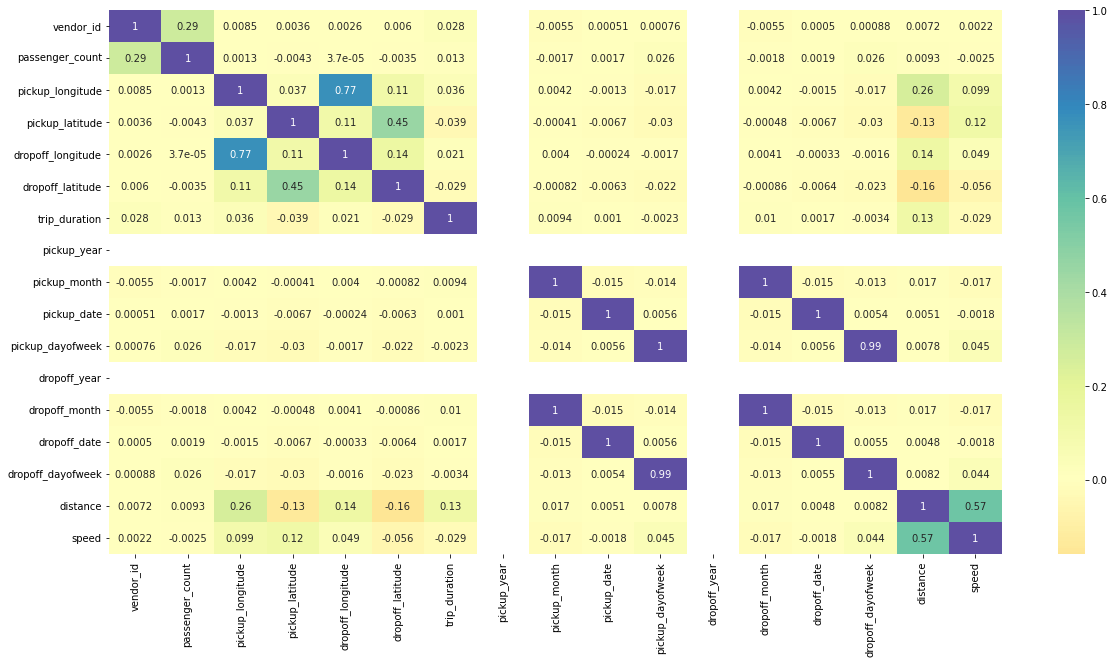

In [1142]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='Spectral', center=0, annot=True)

1. trip duration has 0.13 correlation with distance, correlation with others is less than .03
2. pickup_month, pickup_date and pickup_dayofweek have 1, 1, .99 correlation with their dropoff counterparts.

# Predictions on data

In [1444]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [1445]:
import sklearn

In [1446]:
sklearn.__version__

'0.24.2'

In [1447]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_year', 'pickup_month', 'pickup_date',
       'pickup_dayofweek', 'pickup_hour', 'dropoff_year', 'dropoff_month',
       'dropoff_date', 'dropoff_dayofweek', 'dropoff_hour', 'distance',
       'speed'],
      dtype='object')

saving mean_absolute_error and root mean_squared_error in dictionaries

In [1448]:
mae = {}

In [1449]:
rmse = {}

## dummy regressor

let's create a dummy regressor as a baseline model

In [1540]:
X = df.drop(columns=['trip_duration'])

In [1541]:
y = df['trip_duration']

In [1542]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [1543]:
dummy = DummyRegressor()

In [1544]:
dummy.fit(X_train, y_train)

DummyRegressor()

In [1545]:
dummy.score(X_train, y_train)

0.0

In [1546]:
predictions = dummy.predict(X_test)

In [1547]:
predictions

array([956.08067155, 956.08067155, 956.08067155, ..., 956.08067155,
       956.08067155, 956.08067155])

In [1548]:
dummy.score(X_test, y_test)

-5.213589114205774e-06

Mean absolute error

In [1549]:
mean_absolute_error(y_test, predictions)

616.7752715241194

Root mean squared error

In [1550]:
mean_squared_error(y_test, predictions, squared=False)

3130.1043153233613

In [1551]:
mae['dummy'] = mean_absolute_error(y_test, predictions)

In [1552]:
rmse['dummy'] = mean_squared_error(y_test, predictions, squared=False)

## Using only distance

In [1553]:
X = np.log(df[['distance']])

In [1554]:
y = np.log(df['trip_duration'])

In [1555]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [1556]:
lr = LinearRegression()

In [1557]:
lr.fit(X_train, y_train)

LinearRegression()

In [1558]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.59784909, 0.6027371 , 0.60080465, 0.59527893, 0.60149295])

In [1559]:
pred = lr.predict(X_test)

In [1560]:
pred

array([7.00512722, 6.49470256, 6.38696697, ..., 6.58584398, 7.07485478,
       6.73990208])

In [1561]:
lr.score(X_test, y_test)

0.5969863084889989

In [1562]:
mean_absolute_error(np.exp(y_test), np.exp(pred))

374.03312978852387

In [1563]:
mean_squared_error(np.exp(y_test), np.exp(pred), squared=False)

3089.7976977442922

In [1564]:
lr.coef_

array([0.64035114])

In [1565]:
mae['only distance'] = mean_absolute_error(np.exp(y_test), np.exp(pred))

In [1566]:
rmse['only distance'] = mean_squared_error(np.exp(y_test), np.exp(pred), squared=False)

## Using all relevant columns

Converting hour to categorical column

In [1567]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_year', 'pickup_month', 'pickup_date',
       'pickup_dayofweek', 'pickup_hour', 'dropoff_year', 'dropoff_month',
       'dropoff_date', 'dropoff_dayofweek', 'dropoff_hour', 'distance',
       'speed'],
      dtype='object')

In [1568]:
X = df[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude','store_and_fwd_flag', 'pickup_month', 
        'pickup_date', 'pickup_dayofweek', 'pickup_hour', 'dropoff_hour', 'distance']]

In [1569]:
X['distance'] = np.log(X['distance'])

C:\Users\dsanr\AppData\Local\Temp/ipykernel_8292/2349647098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['distance'] = np.log(X['distance'])


In [1570]:
X = pd.get_dummies(X, columns=['store_and_fwd_flag', 'pickup_dayofweek', 'pickup_hour', 'dropoff_hour'])

In [1571]:
y = np.log(df['trip_duration'])

In [1572]:
scaler = RobustScaler()

In [1573]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [1574]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [1575]:
lr = LinearRegression()

In [1576]:
lr.fit(X_train, y_train)

LinearRegression()

In [1577]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.61186726, 0.63822546, 0.63229984, 0.63014123, 0.63399507])

In [1578]:
pred = lr.predict(X_test)

In [1579]:
pred

array([6.94334641, 6.5140003 , 6.41745795, ..., 6.78997948, 6.99079476,
       6.9264955 ])

In [1580]:
lr.score(X_test, y_test)

0.6317181790823653

In [1581]:
mean_absolute_error(np.exp(y_test), np.exp(pred))

355.9648809452833

In [1582]:
mean_squared_error(np.exp(y_test), np.exp(pred), squared=False)

3328.108193521032

In [1583]:
mae['all columns'] = mean_absolute_error(np.exp(y_test), np.exp(pred))

In [1584]:
rmse['all columns'] = mean_squared_error(np.exp(y_test), np.exp(pred), squared=False)

In [1585]:
coeff = pd.DataFrame({'columns':X.columns, 'coef':lr.coef_})
coeff.sort_values(by='coef', ascending=False)

,columns,coef
6,distance,0.741934
17,pickup_hour_morning,0.233891
12,pickup_dayofweek_3,0.062039
11,pickup_dayofweek_2,0.055751
13,pickup_dayofweek_4,0.048655
4,pickup_month,0.046473
21,dropoff_hour_night,0.041259
10,pickup_dayofweek_1,0.031292
19,dropoff_hour_evening,0.026405
8,store_and_fwd_flag_Y,0.009321


Text(0.5, 1.0, 'Coefficient plot')

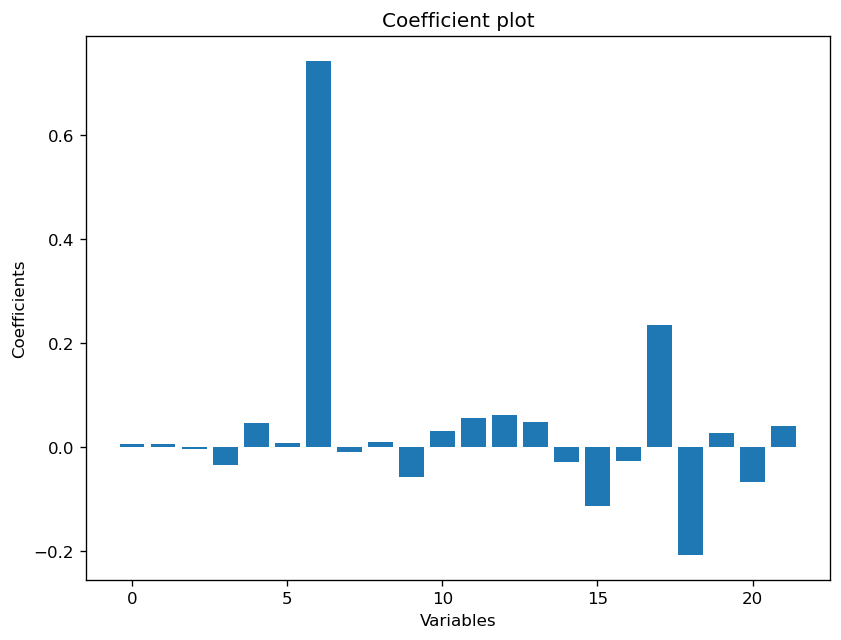

In [1586]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X.columns))
y = lr.coef_
plt.bar(x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [1587]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({'test values' : np.exp(y_test), 'predicted values' : np.exp(pred)})

residuals['residuals'] = residuals['test values'] - residuals['predicted values']
residuals.head()

,test values,predicted values,residuals
49091,1518.0,1036.232078,481.767922
44856,749.0,674.519310,74.480690
307607,404.0,612.444267,-208.444267
108234,1046.0,1077.519532,-31.519532
647958,1299.0,1775.374569,-476.374569


In [1588]:
residuals['residuals'].mean()

170.5438444392533

In [1589]:
residuals['residuals'].min()

-584411.3457214424

In [1590]:
residuals.shape

(217927, 3)

### Plotting residuals

C:\Users\dsanr\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='residuals', ylabel='Count'>

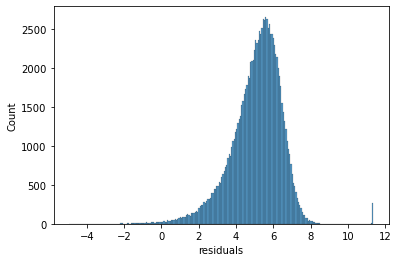

In [1591]:
sns.histplot(np.log(residuals['residuals']))

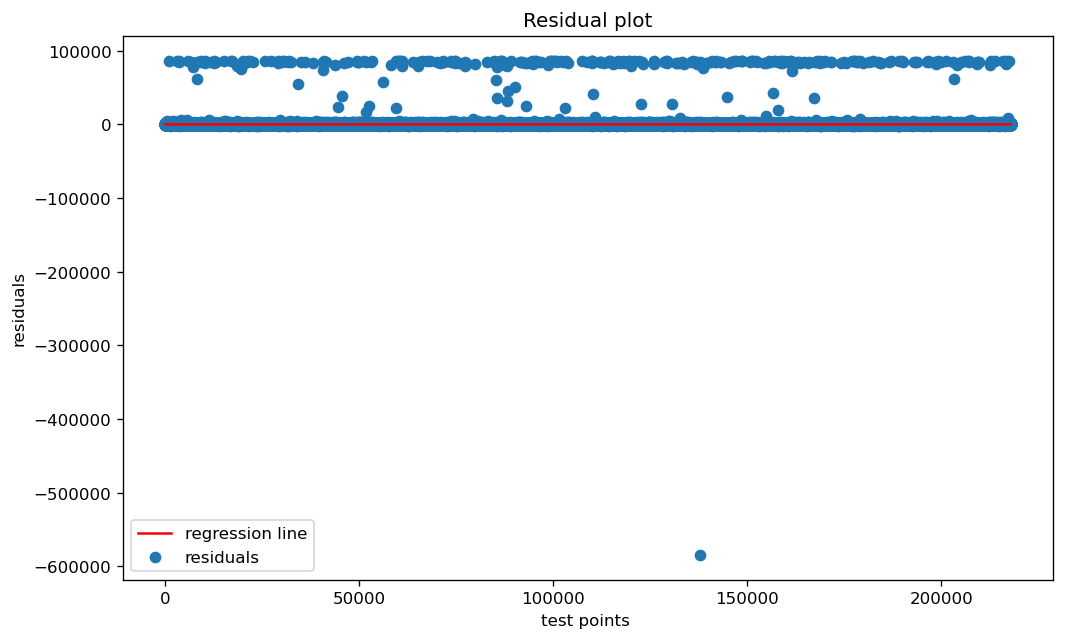

In [1592]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,residuals.shape[0])
k = [0 for i in range(0,residuals.shape[0])]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('test points ')
plt.ylabel('residuals')
plt.title('Residual plot')
# plt.ylim(-100000, 100000)
plt.legend()

There are outliers in residuals

## Removing outliers

<AxesSubplot:xlabel='speed'>

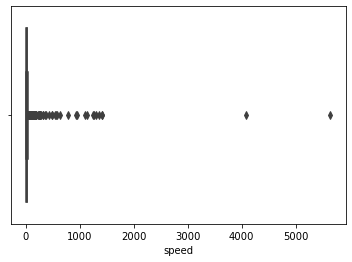

In [1593]:
sns.boxplot(x=df['speed'])

### very high speed

having average speed more than 100 km per hour for taxi in New York City is almost impossible. It likely because of human or instrument error in time or distance measurements.

distance in kilometers (great circle distance), trip_duration in seconds

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

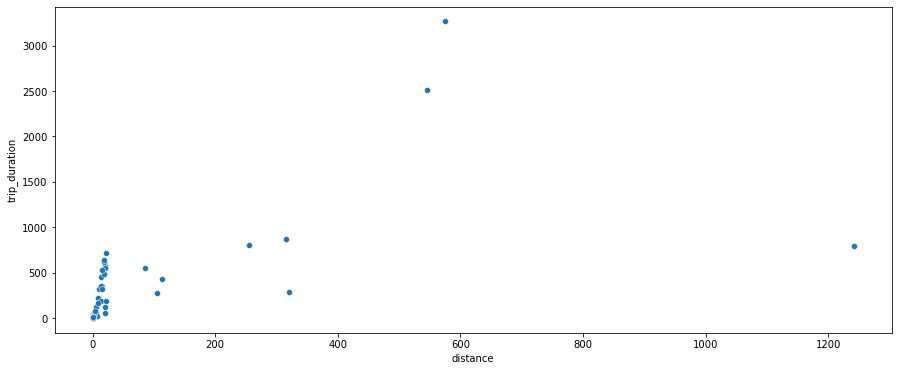

In [1594]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df[(df['speed'] > 100)], x='distance', y='trip_duration')

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

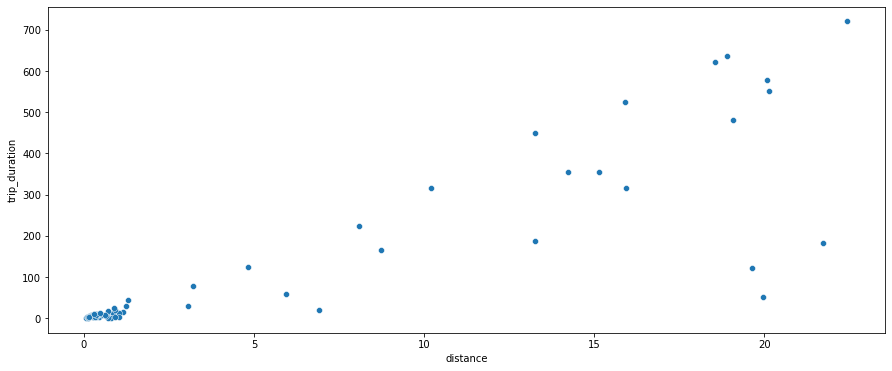

In [1595]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df[(df['speed'] > 100)&(df['distance']<50)], x='distance', y='trip_duration')

In [1596]:
df_s=df[(df['speed'] < 100)]

C:\Users\dsanr\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


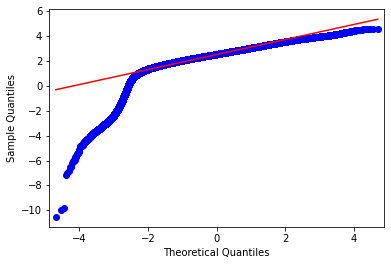

In [1597]:
sm.qqplot(np.log(df_s['speed']), line='s');

log of speed doesn't fit normal distribution.

<AxesSubplot:xlabel='speed'>

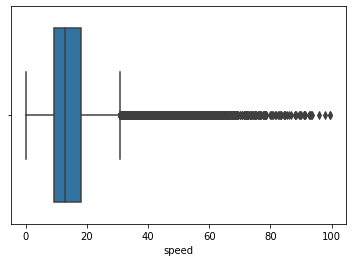

In [1598]:
sns.boxplot(x=df_s['speed'])

let's also look into values with very low speeds

### very high trip duration

scatter plot of distance and trip duration excluding single value of 23 days trip duration and values of speed more than 100

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

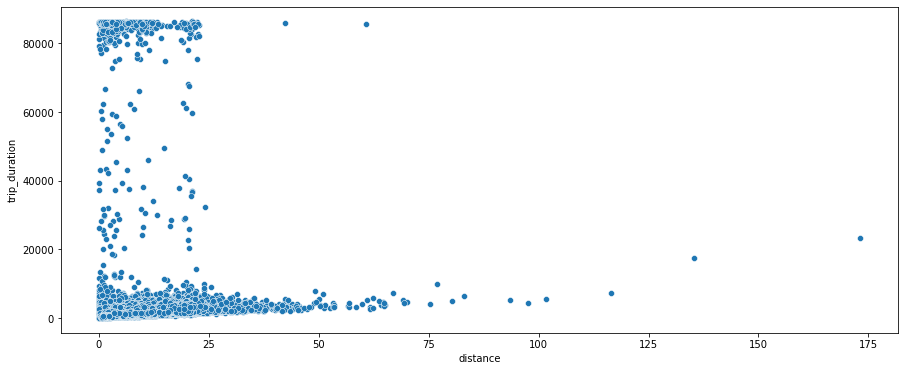

In [1599]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df[(df['speed'] < 100) & (df['trip_duration'] < 1900000)], x='distance', y='trip_duration')

As we can see there is a cluster of entries with trip duration between 80000 and 86400 seconds(one day) while having distance of less than 25 KM. This values are likely to be measurement errors, extreme traffic or weather events, taxi break down, driver forgetting to turn off meter or any other. We can treat these entries separately.

In [1600]:
df_out = df_s[df_s['trip_duration'] < 36000]

<AxesSubplot:xlabel='distance', ylabel='Count'>

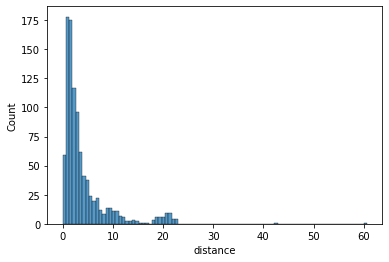

In [1601]:
sns.histplot(df[(df['trip_duration'] < 86400) & (df['trip_duration'] > 36000)]['distance'])

most entries with trip duration more than 10 hours has traveled less than 25 KMs.

C:\Users\dsanr\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


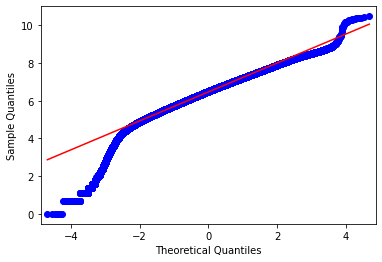

In [1602]:
sm.qqplot(np.log(df_out['trip_duration']), line='s');

log of trip duration is not normal distribution. we can very low values of trip duration

In [1603]:
df_out = df_out[df_out['trip_duration'] > 30]

C:\Users\dsanr\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


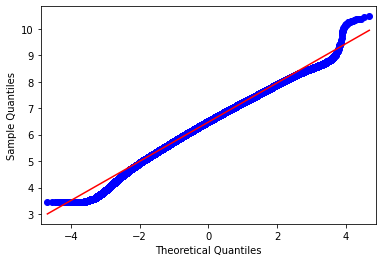

In [1604]:
sm.qqplot(np.log(df_out['trip_duration']), line='s');

### prediction

In [1605]:
X = df_out[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude','store_and_fwd_flag', 'pickup_month', 
        'pickup_date', 'pickup_dayofweek', 'pickup_hour', 'dropoff_hour', 'distance']]

In [1606]:
X['distance'] = np.log(X['distance'])

C:\Users\dsanr\AppData\Local\Temp/ipykernel_8292/2349647098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['distance'] = np.log(X['distance'])


In [1607]:
X = pd.get_dummies(X, columns=['store_and_fwd_flag', 'pickup_dayofweek', 'pickup_hour', 'dropoff_hour'])

In [1608]:
y = np.log(df_out['trip_duration'])

In [1609]:
scaler = RobustScaler()

In [1610]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [1611]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [1612]:
lr = LinearRegression()

In [1613]:
lr.fit(X_train, y_train)

LinearRegression()

In [1614]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.6181526 , 0.64900606, 0.65711784, 0.65144065, 0.65058853])

In [1615]:
pred = lr.predict(X_test)

In [1616]:
pred

array([6.17353996, 7.08862149, 5.78830171, ..., 6.49292493, 5.66499626,
       6.90276466])

In [1617]:
lr.score(X_test, y_test)

0.653221986128264

In [1618]:
mean_absolute_error(np.exp(y_test), np.exp(pred))

242.8756979115573

In [1619]:
mean_squared_error(np.exp(y_test), np.exp(pred), squared=False)

414.7877605371987

In [1620]:
mae['removing outliers'] = mean_absolute_error(np.exp(y_test), np.exp(pred))

In [1621]:
rmse['removing outliers'] = mean_squared_error(np.exp(y_test), np.exp(pred), squared=False)

In [1622]:
coeff = pd.DataFrame({'columns':X.columns, 'coef':lr.coef_})
coeff.sort_values(by='coef', ascending=False)

,columns,coef
6,distance,0.736139
17,pickup_hour_morning,0.232512
12,pickup_dayofweek_3,0.063762
11,pickup_dayofweek_2,0.056414
13,pickup_dayofweek_4,0.049525
4,pickup_month,0.048061
21,dropoff_hour_night,0.035556
10,pickup_dayofweek_1,0.030725
19,dropoff_hour_evening,0.029187
8,store_and_fwd_flag_Y,0.014176


Text(0.5, 1.0, 'Coefficient plot')

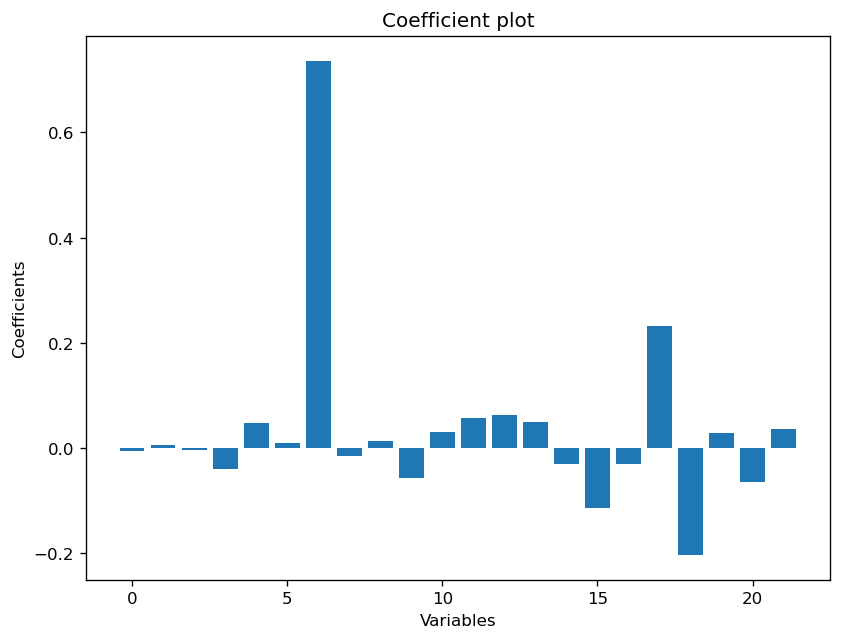

In [1623]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X.columns))
y = lr.coef_
plt.bar(x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

### Plotting residuals

In [1624]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({'test values' : np.exp(y_test), 'predicted values' : np.exp(pred)})

residuals['residuals'] = residuals['test values'] - residuals['predicted values']
residuals.head()

,test values,predicted values,residuals
60651,576.0,479.881864,96.118136
649746,1801.0,1198.254859,602.745141
442559,440.0,326.458132,113.541868
152665,549.0,613.014723,-64.014723
423456,716.0,451.793482,264.206518


In [1625]:
residuals.shape

(217092, 3)

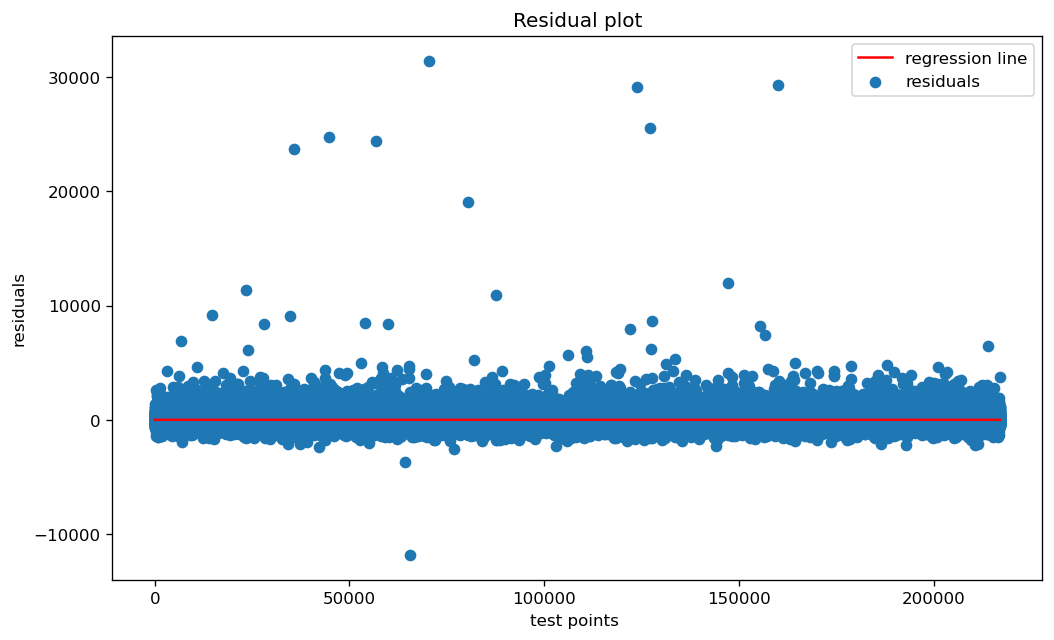

In [1626]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,residuals.shape[0])
k = [0 for i in range(0,residuals.shape[0])]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('test points ')
plt.ylabel('residuals')
plt.title('Residual plot')
# plt.ylim(-100000, 100000)
plt.legend()

There are only few outliers

## summery of mae and rmse

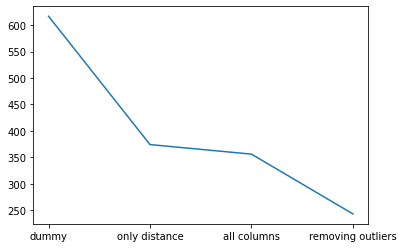

In [1628]:
plt.plot(mae.keys(), mae.values())

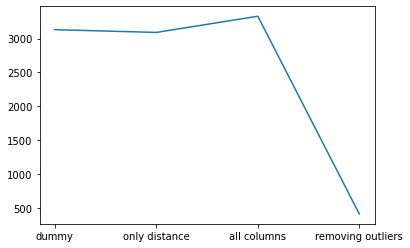

In [1629]:
plt.plot(rmse.keys(), rmse.values())